In [2]:
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

In [8]:
import pyregion

In [9]:
hdu = fits.open("data/observation_cube.fits.gz")

In [10]:
! mv /Users/mxhf/Downloads/noise_samples.reg N891_noise_samples_image.reg

mv: /Users/mxhf/Downloads/noise_samples.reg: No such file or directory


In [11]:
#import pyregion
#region_name = "N891_noise_samples_image.reg"
#r = pyregion.open(region_name)

In [12]:
with open("N891_noise_samples_image.reg") as f:
    region_string = f.read()

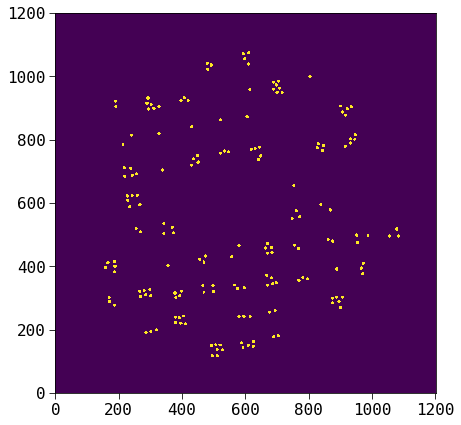

In [13]:
region = pyregion.parse(region_string).as_imagecoord(hdu[0].header)

r = pyregion.parse(region_string)
mask = r.get_mask(shape=hdu[0].data[0].shape)

f = plt.figure(figsize = [15,15])
#plt.subplot(121).imshow(mask_1or2, origin="lower", interpolation="nearest")
plt.subplot(122).imshow(mask, origin="lower", interpolation="none")
plt.show()

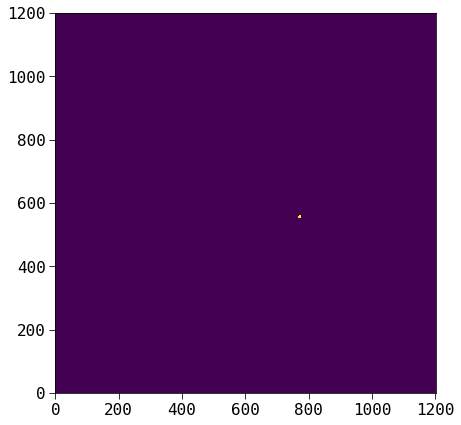

In [14]:
myfilter = region.get_filter()
mask = (myfilter[0]).mask(hdu[0].data[0].shape)

f = plt.figure(figsize = [15,15])
#plt.subplot(121).imshow(mask_1or2, origin="lower", interpolation="nearest")
plt.subplot(122).imshow(mask, origin="lower", interpolation="none")
plt.show()

In [16]:
data = np.zeros([hdu[0].data.shape[0], len(myfilter), 2 ])

wlgrid = np.arange( hdu[0].data.shape[0] ) * 2. + 3470.


for j,f in enumerate(myfilter):
    print("{} of {}".format(j, len(myfilter)))
    mask = (f).mask(hdu[0].data[0].shape)
    mm = []
    ss = []

    
    for i,w in enumerate(wlgrid):
        sl = hdu[0].data[i]
        mm.append( np.mean(sl[mask]) )
        ss.append( np.std(sl[mask]) )
        
    data[:,j,0] = mm
    data[:,j,1] = ss

0 of 175
1 of 175
2 of 175
3 of 175
4 of 175
5 of 175
6 of 175
7 of 175
8 of 175
9 of 175
10 of 175
11 of 175
12 of 175
13 of 175
14 of 175
15 of 175
16 of 175
17 of 175
18 of 175
19 of 175
20 of 175
21 of 175
22 of 175
23 of 175
24 of 175
25 of 175
26 of 175
27 of 175
28 of 175
29 of 175
30 of 175
31 of 175
32 of 175
33 of 175
34 of 175
35 of 175
36 of 175
37 of 175
38 of 175
39 of 175
40 of 175
41 of 175
42 of 175
43 of 175
44 of 175
45 of 175
46 of 175
47 of 175
48 of 175
49 of 175
50 of 175
51 of 175
52 of 175
53 of 175
54 of 175
55 of 175
56 of 175
57 of 175
58 of 175
59 of 175
60 of 175
61 of 175
62 of 175
63 of 175
64 of 175
65 of 175
66 of 175
67 of 175
68 of 175
69 of 175
70 of 175
71 of 175
72 of 175
73 of 175
74 of 175
75 of 175
76 of 175
77 of 175
78 of 175
79 of 175
80 of 175
81 of 175
82 of 175
83 of 175
84 of 175
85 of 175
86 of 175
87 of 175
88 of 175
89 of 175
90 of 175
91 of 175
92 of 175
93 of 175
94 of 175
95 of 175
96 of 175
97 of 175
98 of 175
99 of 175
100 of 175

(1e-20, 1e-18)

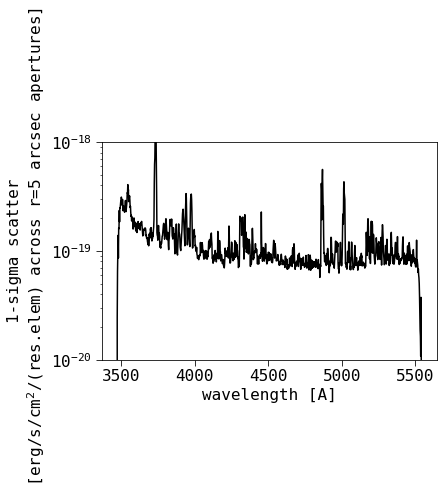

In [21]:
plt.plot( wlgrid, np.std(data[:,:,0]*1e-17 * 2.01, axis=1) ) # x 2.01 to go to resolution element
plt.ylim([0.,0.03])
plt.xlabel("wavelength [A]")
plt.ylabel("1-sigma scatter\n [erg/s/cm$^2$/(res.elem) across r=5 arcsec apertures]")
plt.yscale('log')
plt.ylim([1e-20,1e-18])

In [ ]:
plt.plot( wlgrid, np.std(data[:,:,0], axis=1) )
plt.ylim([0.,0.03])
plt.xlabel("wavelength [A]")
plt.ylabel("1-sigma scatter\n [erg/s/cm$^2$/A across r=5 arcsec apertures]")

Text(0, 0.5, 'mean 1-sigma noise\n [erg/s/cm$^2$/A within 10 arcsec aperture]')

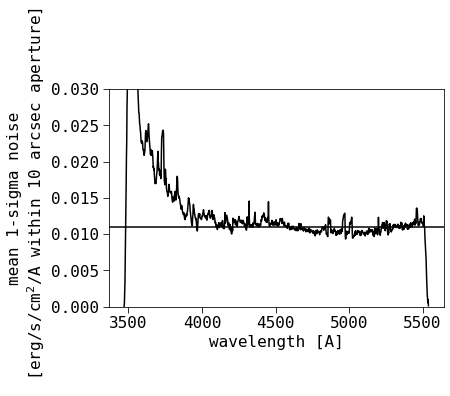

In [18]:
plt.plot( wlgrid, np.mean(data[:,:,1], axis=1) )
plt.axhline(0.011)
plt.ylim([0.,0.03])
plt.xlabel("wavelength [A]")
plt.ylabel("mean 1-sigma noise\n [erg/s/cm$^2$/A within 10 arcsec aperture]")

In [ ]:
plt.plot( wlgrid, np.mean(data[:,:,1]*np.sqrt(1.5**2.*3.141)/np.sqrt(5.**2. * 3.141), axis=1) )